In [1]:
import numpy as np
import os,cv2,dlib,sys
import matplotlib.pyplot as plt


# Random wearing masks

In [25]:
# ----read mask png images
mask_files = [file.path for file in os.scandir(mask_img_dir) if file.name.split(".")[-1] == 'png']
mask_paths = list()
len_mask = len(mask_files)
if len_mask == 0:
    print("Error: no face mask PNG images in  ", mask_img_dir)

        

In [26]:
# ----face detection init
detector = dlib.get_frontal_face_detector()


In [27]:
def detect_mouth(img,detector,predictor):
    x_min = None
    x_max = None
    y_min = None
    y_max = None
    size = None

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector(img, 0)
    #print("len of faces = ",len(faces))
    if len(faces):
        for coor in (faces):#coordinate format:[(left,top), (right,bottom)]
            x = list()
            y = list()
            height = coor.bottom() - coor.top()
            width = coor.right() - coor.left()
            # shape = predictor(img_gray, d)
            landmark = predictor(img, coor)

            #----get the mouth part
            for i in range(48, 68):
                x.append(landmark.part(i).x)
                y.append(landmark.part(i).y)

            y_max = np.minimum(max(y) + height // 3, img.shape[0])
            y_min = np.maximum(min(y) - height // 3, 0)
            x_max = np.minimum(max(x) + width // 3, img.shape[1])
            x_min = np.maximum(min(x) - width // 3, 0)

            size = ((x_max-x_min),(y_max-y_min))#(width,height)

    return x_min, x_max, y_min, y_max, size

(277, 305, 4)


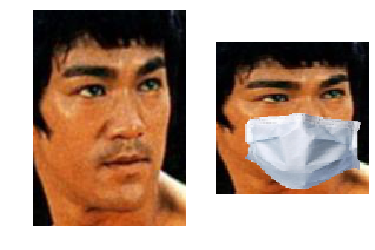

In [47]:
resize = (100,100)#(width,height)

img = cv2.imread(path)
if img is None:
    print("read failed:",path)
else:
    img_ori = img.copy()
    
    x_min, x_max, y_min, y_max, size = detect_mouth(img, detector, predictor)
    
    if size is not None:
        # ----random selection of face mask
        which = np.random.randint(0, len_mask - 1)
        #print(which)
        item_name = mask_files[which]

        # ----face mask process
        item_img = cv2.imread(item_name, cv2.IMREAD_UNCHANGED)
        print(item_img.shape)
        item_img = cv2.resize(item_img, size)
        item_img_rgb = item_img[:, :, :3]
        #item_img_rgb = item_img_rgb[:,:,::-1]#transform the color format to RGB
        
        item_alpha_ch = item_img[:, :, 3]
        _, item_mask = cv2.threshold(item_alpha_ch, 220, 255, cv2.THRESH_BINARY)
        img_item = cv2.bitwise_and(item_img_rgb, item_img_rgb, mask=item_mask)

        #----mouth part process
        roi = img[y_min:y_min + size[1], x_min:x_min + size[0]]
        item_mask_inv = cv2.bitwise_not(item_mask)
        roi = cv2.bitwise_and(roi, roi, mask=item_mask_inv)

        #----addition of mouth and face mask
        dst = cv2.add(roi, img_item)
        img[y_min: y_min + size[1], x_min:x_min + size[0]] = dst
        
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img_ori = cv2.cvtColor(img_ori,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,resize)

        # -----save img
#         splits = path.split("\\")
#         new_filename = os.path.join(sub_dir_dict[splits[-2]], splits[-1])
#         cv2.imwrite(new_filename, img)

        plt.subplot(1,2,1)
        plt.imshow(img_ori)
        plt.axis('off')

        plt.subplot(1,2,2)
        plt.imshow(img)
        plt.axis('off')

        plt.show()

# Random crop

start point:  (4, 7)


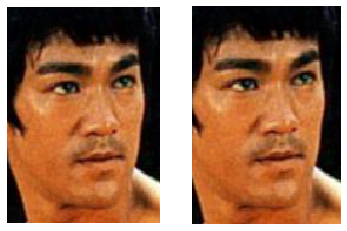

In [259]:
resize = (100,100)#(width,height)
x_range = 10
y_range = 20

img = cv2.imread(path)
if img is None:
    print("read failed:",path)
else:
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#     img = cv2.resize(img,resize)
    
    #----resize the image 1.15 times
    #img = cv2.resize(img,None,fx=1.15,fy=1.15)
    
    #----find a random point in the 15 x 15 area
    
    
    x_start = np.random.randint(x_range)
    y_start = np.random.randint(y_range)
    print("start point: ",(y_start,x_start))
    
    #----from the random point, crop the image of 100 x 100
    img_2 = img[y_start:,x_start:,:]
    
    
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.axis('off')
    
    plt.subplot(1,2,2)
    plt.imshow(img_2)
    plt.axis('off')
    
    plt.show()
    
    

# Random flip

1


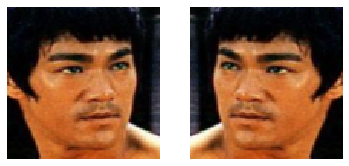

In [16]:
resize = (100,100)#(width,height)
flip_list = [1, 0]

img = cv2.imread(path)
if img is None:
    print("read failed:",path)
else:
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,resize)
    
    flip_type = np.random.choice(flip_list)
    print(flip_type)
    if flip_type == 1:
        img_2 = cv2.flip(img, flip_type)
    else:
        img_2 = img
        
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.axis('off')
    
    plt.subplot(1,2,2)
    plt.imshow(img_2)
    plt.axis('off')
    
    plt.show()
        



# Random noise(impulse noise)

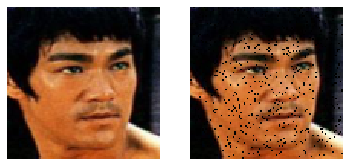

In [34]:
resize = (100,100)#(width,height)
flip_list = [1, 0]

img = cv2.imread(path)
if img is None:
    print("read failed:",path)
else:
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,resize)
    
    uniform_noise = np.empty((img.shape[0], img.shape[1]), dtype=np.uint8)
    cv2.randu(uniform_noise, 0, 255)
    ret, impulse_noise = cv2.threshold(uniform_noise, 240, 255, cv2.THRESH_BINARY_INV)
    img_2 = cv2.bitwise_and(img, img, mask=impulse_noise)
    
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.axis('off')
    
    plt.subplot(1,2,2)
    plt.imshow(img_2)
    plt.axis('off')
    
    plt.show()

# Random noise(Gaussian noise)

kernel:  (9, 9)


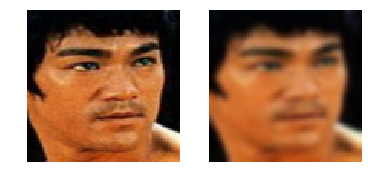

In [57]:
kernel_list = [1,3,5,7]

img = cv2.imread(path)
if img is None:
    print("read failed:",path)
else:
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,resize)
    
    kernel = tuple(np.random.choice(kernel_list,size=2))
    print("kernel: ",kernel)
    img_2 = cv2.GaussianBlur(img,kernel,0,0)
#     img_2 = cv2.medianBlur(img,3)
     
#     gaussian_noise = np.empty((img.shape),dtype=np.uint8)
#     print(gaussian_noise.shape)
#     cv2.randn(gaussian_noise, 128, 20)
    
#     gaussian_noise = (gaussian_noise*0.5).astype(np.uint8)
#     img_2 = cv2.add(img,gaussian_noise)
    
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.axis('off')
    
    plt.subplot(1,2,2)
    plt.imshow(img_2)
    plt.axis('off')
    
    plt.show()

# Random brightness

mean_br:  69.22896666666666
br_factor:  49


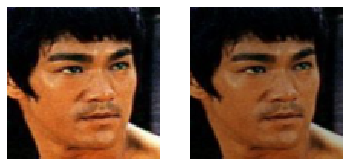

In [56]:
resize = (100,100)#(width,height)
flip_list = [1, 0]

img = cv2.imread(path)
if img is None:
    print("read failed:",path)
else:
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,resize)
    
    mean_br = np.mean(img)
    print("mean_br: ",mean_br)
    
    br_factor = np.random.randint(mean_br * 0.7, mean_br * 1.3)
    print("br_factor: ",br_factor)
    
    img_2 = np.clip(img / mean_br * br_factor, 0, 255)#the multification makes the numeric type become floating
    img_2 = img_2.astype(np.uint8)  #transform the numeric type to unsigned integer 8(UINT8)
    
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.axis('off')
    
    plt.subplot(1,2,2)
    plt.imshow(img_2)
    plt.axis('off')
    
    plt.show()

# Random angle

angle:  -34


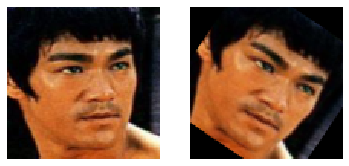

In [86]:
resize = (100,100)#(width,height)
flip_list = [1, 0]

img = cv2.imread(path)
if img is None:
    print("read failed:",path)
else:
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,resize)
    
    angle = np.random.randint(-60, 60)
    print("angle: ",angle)
    
    height, width = img.shape[:2]
    M = cv2.getRotationMatrix2D((width // 2, height // 2), angle, 1.0)
    img_2 = cv2.warpAffine(img, M, (height, width))
    
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.axis('off')
    
    plt.subplot(1,2,2)
    plt.imshow(img_2)
    plt.axis('off')
    
    plt.show()

In [59]:
def get_4D_data(paths,img_shape,process_dict=None):
    #----var
    re_array = []
    processing_enable = False
    x_range = 10
    y_range = 20
    flip_list = [1, 0]
    kernel_list = [1,3,5,7]

    #----check process_dict
    if isinstance(process_dict,dict):
        if len(process_dict) > 0:
            processing_enable = True#image processing is enabled
            

    for path in paths:
        img = cv2.imread(path)
        if img is None:
            print("read failed:",path)
        else:
            #----image processing
            if processing_enable is True:
                if 'rdm_crop' in process_dict.keys():
                    if process_dict['rdm_crop'] is True:
#                         img = cv2.resize(img,(width_rdm_crop,height_rdm_crop))

                        # ----Find a random point
                        x_start = np.random.randint(x_range)
                        y_start = np.random.randint(y_range)

                        # ----From the random point, crop the image
                        img = img[y_start:, x_start:, :]
                if 'rdm_br' in process_dict.keys():
                    if process_dict['rdm_br'] is True:
                        mean_br = np.mean(img)
                        br_factor = np.random.randint(mean_br * 0.7, mean_br * 1.3)
                        img = np.clip(img / mean_br * br_factor, 0, 255)#the multification makes the numeric type become floating
                        img = img.astype(np.uint8)#transform the numeric type to unsigned integer 8(UINT8)
                if 'rdm_mask' in process_dict.keys():
                    if process_dict['rdm_mask'] is True:
                        x_min, x_max, y_min, y_max, size = detect_mouth(img, detector, predictor)
                        if size is not None:
                            # ----random selection of face mask
                            which = np.random.randint(0, len_mask - 1)
                            #print(which)
                            item_name = mask_files[which]

                            # ----face mask process
                            item_img = cv2.imread(item_name, cv2.IMREAD_UNCHANGED)
                            #item_img = mask_paths[which]
                            print(item_img.shape)
                            item_img = cv2.resize(item_img, size)
                            item_img_rgb = item_img[:, :, :3]
                            #item_img_rgb = item_img_rgb[:,:,::-1]#transform the color format to RGB

                            item_alpha_ch = item_img[:, :, 3]
                            _, item_mask = cv2.threshold(item_alpha_ch, 220, 255, cv2.THRESH_BINARY)
                            img_item = cv2.bitwise_and(item_img_rgb, item_img_rgb, mask=item_mask)

                            # ----mouth part process
                            roi = img[y_min:y_min + size[1], x_min:x_min + size[0]]
                            item_mask_inv = cv2.bitwise_not(item_mask)
                            roi = cv2.bitwise_and(roi, roi, mask=item_mask_inv)

                            # ----addition of mouth and face mask
                            dst = cv2.add(roi, img_item)
                            img[y_min: y_min + size[1], x_min:x_min + size[0]] = dst
                            
                
                if 'rdm_blur' in process_dict.keys():
                    if process_dict['rdm_blur'] is True:
                        kernel = tuple(np.random.choice(kernel_list,size=2))
                        print("kernel:",kernel)
                        img = cv2.GaussianBlur(img,kernel,0,0)
                        
                if 'rdm_flip' in process_dict.keys():
                    if process_dict['rdm_flip'] is True:
                        flip_type = np.random.choice(flip_list)
                        if flip_type == 1:
                            img = cv2.flip(img, flip_type)
                if 'rdm_noise' in process_dict.keys():
                    if process_dict['rdm_noise'] is True:
                        uniform_noise = np.empty((img.shape[0], img.shape[1]), dtype=np.uint8)
                        cv2.randu(uniform_noise, 0, 255)
                        ret, impulse_noise = cv2.threshold(uniform_noise, 240, 255, cv2.THRESH_BINARY_INV)
                        img = cv2.bitwise_and(img, img, mask=impulse_noise)
                if 'rdm_angle' in process_dict.keys():
                    if process_dict['rdm_angle'] is True:
                        angle = np.random.randint(-15, 15)
                        img = cv2.resize(img,(img_shape[1],img_shape[0]))
                        print(img.shape)
                        h, w = img.shape[:2]
                        M = cv2.getRotationMatrix2D((w // 2, h // 2), angle, 1.0)
                        img = cv2.warpAffine(img, M, (h, w))
            #----
            img = cv2.resize(img,(img_shape[1],img_shape[0]))
            img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            img = img.astype(np.float32)
            img /= 255
            re_array.append(img)

    re_array = np.array(re_array)

    return re_array

(439, 570, 4)
kernel: (5, 3)
(112, 112, 3)


(-0.5, 111.5, 111.5, -0.5)

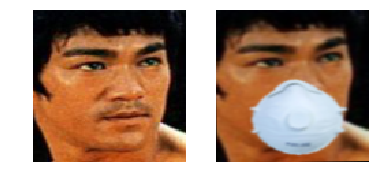

In [94]:
paths = [path]

process_dict = {'rdm_mask':True,'rdm_crop':True,'rdm_br':True,'rdm_blur':True,'rdm_flip':True,'rdm_noise':False,'rdm_angle':True}

ori = get_4D_data(paths,[112,112,3],process_dict=None)

processed = get_4D_data(paths,[112,112,3],process_dict=process_dict)

plt.subplot(1,2,1)
plt.imshow(ori[0])
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(processed[0])
plt.axis('off')

# Random test

In [95]:
root_dir = r"F:\dataset\CASIA\CASIA-WebFace_aligned"

paths = list()
img_format = {'png', 'jpg'}

for dir_name, sub_dirname, filenames in os.walk(root_dir):
    if len(filenames):
        for filename in filenames:
            if filename[-3:] in img_format:
                paths.append(os.path.join(dir_name,filename))
        

kernel: (7, 5)
(112, 112, 3)
(412, 423, 4)
kernel: (3, 5)
(112, 112, 3)
(164, 193, 4)
kernel: (7, 5)
(112, 112, 3)


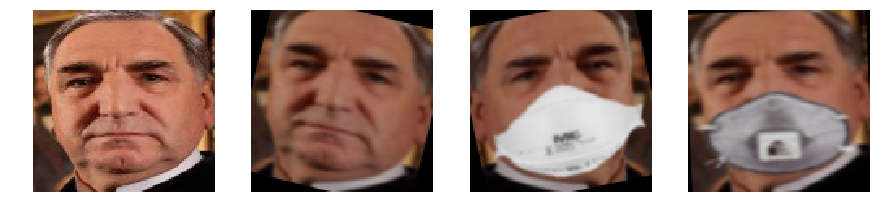

In [102]:
aug_times = 4
path = [np.random.choice(paths)]

img_shape = [112,112,3]
batch_data_shape = [aug_times]
batch_data_shape.extend(img_shape)
batch_data = np.zeros(batch_data_shape,dtype=np.float32)

p_dict_1 = {'rdm_mask':False,'rdm_crop':True,'rdm_br':True,'rdm_blur':True,'rdm_flip':True,'rdm_noise':False,'rdm_angle':True}
p_dict_2 = {'rdm_mask':True,'rdm_crop':True,'rdm_br':True,'rdm_blur':True,'rdm_flip':True,'rdm_noise':False,'rdm_angle':True}
p_dict_3 = {'rdm_mask':True,'rdm_crop':True,'rdm_br':True,'rdm_blur':True,'rdm_flip':True,'rdm_noise':False,'rdm_angle':True}

for i in range(aug_times):
    if i == 0:
        temp = get_4D_data(path,img_shape,process_dict=None)
        
    elif i == 1:
        temp = get_4D_data(path,img_shape,process_dict=p_dict_1)
    elif i == 2:
        temp = get_4D_data(path,img_shape,process_dict=p_dict_2)
    elif i == 3:
        temp = get_4D_data(path,img_shape,process_dict=p_dict_3)
    batch_data[i] = temp[0]
    
plt.figure(figsize=(15,15))
for i in range(aug_times):
    
    plt.subplot(1,aug_times,i+1)
    plt.imshow(batch_data[i])
    plt.axis('off')

plt.show()
    
        
        

